**Implementing Auto EDA with ydata-profiling**

In [ ]:
# load data
import pandas as pd

df = pd.read_csv("../data/Lead_Scoring_Raw.csv")

In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate report
profile = ProfileReport(df, title="Lead Conversion Prediction Auto EDA y-data-profiling", explorative=True)

# To save report as html file
profile.to_file("../EDA_Outputs/y-data-profiling_EDA_Report.html")

# Display in Jupyter Notebook
profile.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.41it/s]


**Manual EDA**

In [172]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine
import urllib.parse

import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import urllib.parse
import os
from dotenv import load_dotenv
from pathlib import Path

# Load environment variables from ../.env
load_dotenv(dotenv_path=Path("..") / ".env")

def load_data_from_postgres(
    table_name,
    db_user=os.getenv("DB_USER"),
    db_password=os.getenv("DB_PASSWORD"),
    db_host=os.getenv("DB_HOST"),
    db_port=os.getenv("DB_PORT"),
    db_name=os.getenv("DB_NAME")
):
    """
    Load the dataset from a PostgreSQL table and validate its structure.

    Args:
        table_name (str): Name of the table in PostgreSQL.

    Returns:
        pandas.DataFrame: Loaded dataset.

    Raises:
        ValueError: If required columns are missing or the dataset is empty.
    """
    # Encode password to be URL-safe
    encoded_password = urllib.parse.quote_plus(db_password)

    # Create connection string
    connection_str = f'postgresql+psycopg2://{db_user}:{encoded_password}@{db_host}:{db_port}/{db_name}'
    engine = create_engine(connection_str)

    # Load data
    df = pd.read_sql_table(table_name, con=engine)

    # Check if dataset is empty
    if df.empty:
        raise ValueError("Dataset is empty")

    # Required columns for Lead Scoring project
    required_columns = [
        'Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
        'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website',
        'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
        'How did you hear about X Education', 'What is your current occupation',
        'What matters most to you in choosing a course', 'Search', 'Magazine',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
        'Lead Profile', 'City', 'Asymmetrique Activity Index',
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
        'Asymmetrique Profile Score', 'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview', 'Last Notable Activity'
    ]

    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {', '.join(missing_columns)}")

    print("✅ Dataset loaded successfully from PostgreSQL with shape:", df.shape)
    print(df.head())
    return df


if __name__ == "__main__":

    df = load_data_from_postgres(table_name='lead_scoring_data')
    

✅ Dataset loaded successfully from PostgreSQL with shape: (9240, 37)
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on 

In [174]:
# Display initial records
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [175]:
# Shape of Data
print("\nShape of the data:", df.shape)


Shape of the data: (9240, 37)


Prospect ID and Lead Number adds no additional information so drop these columns

In [176]:
df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore')

In [177]:
# Info & Nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [178]:
df["Converted"].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

Since the imbalance is mild, we can track performance using metrics like F1-score, Precision, Recall, not just Accuracy. And not that much need to balance using SMOTE and other balacing techniques.

In [179]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper  

The columns Lead Source, TotalVisits, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score has null values and to be treated

TotalVisits, Page Views Per Visit, Last Activity have less number of null values while others have significant more number of null values

In [180]:
df['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [181]:
df['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

These "Asymmetrique Profile Index", "Asymmetrique Activity Index" columns have ordinal data as strings. 01.High, 02.Medium and 03.Low so it's better to convert to ordinal data such that High 3, Medium 2 and Low 1 such that these numbers represent the exact meaning of the labels.

In [182]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000               

In [183]:
# Unique values per column
print("\nUnique Values:")
print(df.nunique())


Unique Values:
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper   

Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque have constant value "False" so remove these columns

In [184]:
# Removing as these contains constant value "False"
df = df.drop(columns=["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque"], errors='ignore')

In [185]:
# Column-wise data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper         

In [186]:
# Check for duplicate records
print("\nDuplicate Records:", df.duplicated().sum())


Duplicate Records: 1281


In [ ]:
# many duplicate rows found so drop
df = df.drop_duplicates()

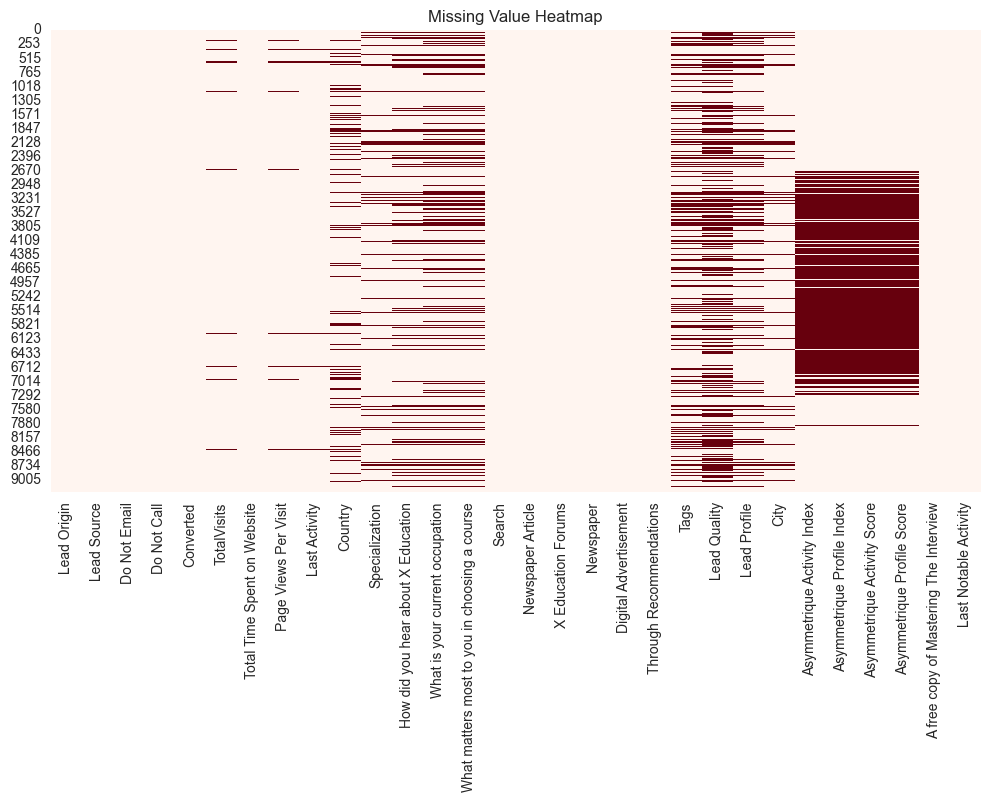

In [188]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Value Heatmap")
plt.show()

In [189]:
df.shape

(7959, 30)

In [190]:
# Split column types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [191]:
numeric_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

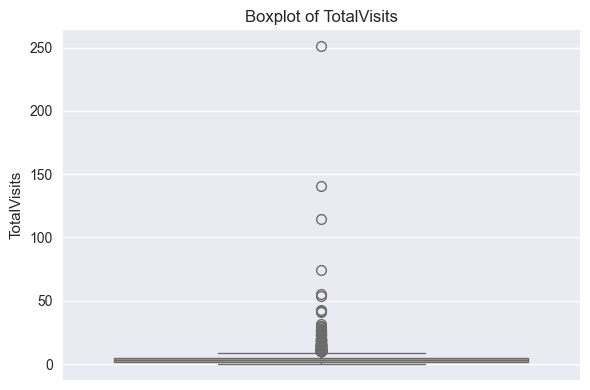

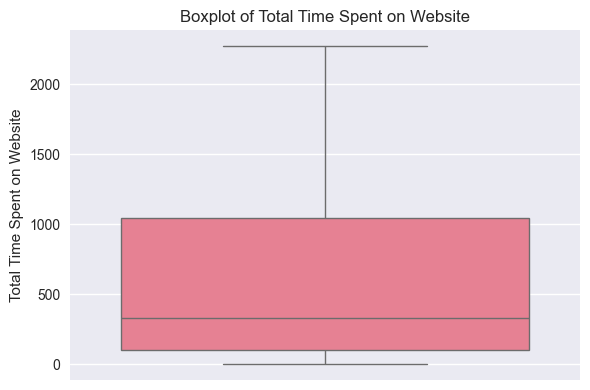

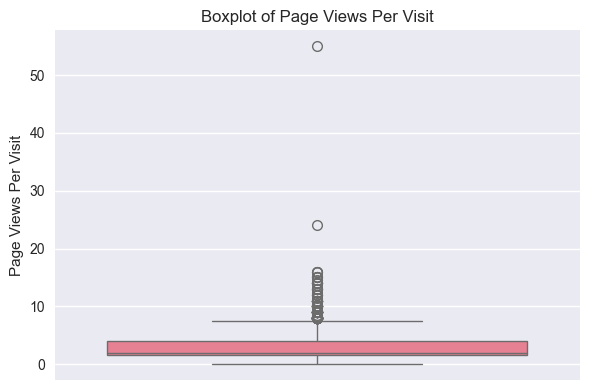

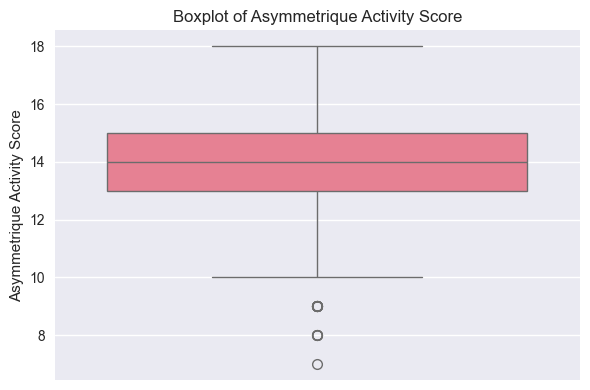

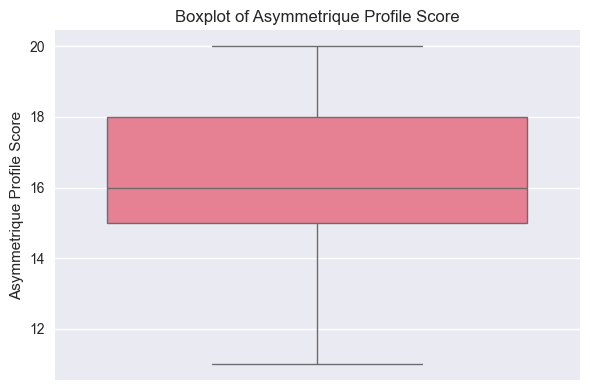

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target if present 
if 'Converted' in num_cols:
    num_cols.remove('Converted')

# Plot boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [193]:
num_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

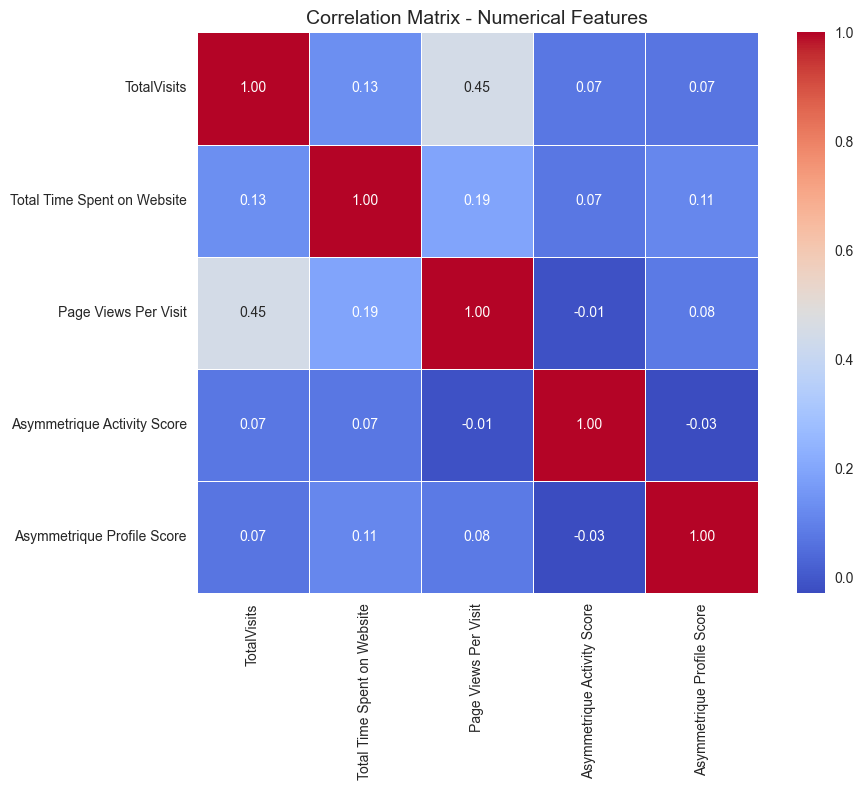

In [194]:
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix - Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

No significant correlations found (>=0.5). So no need to remove any columns

📊 Univariate Analysis


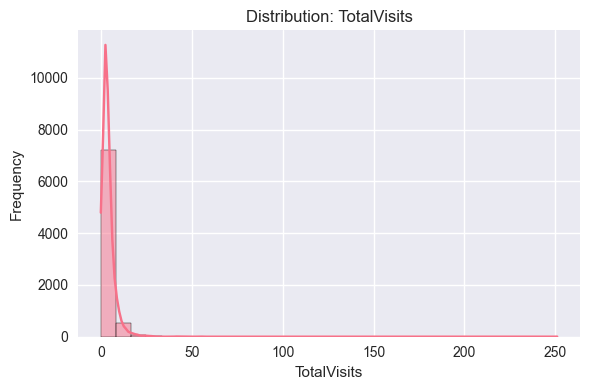

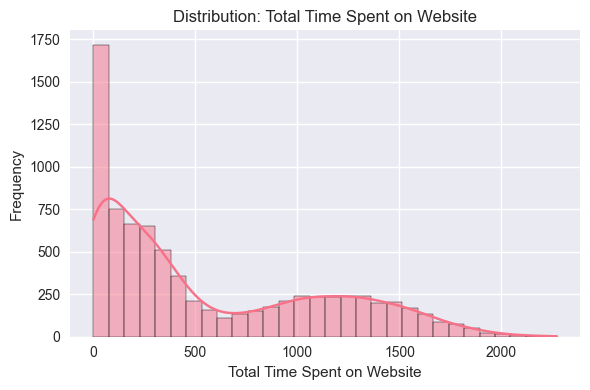

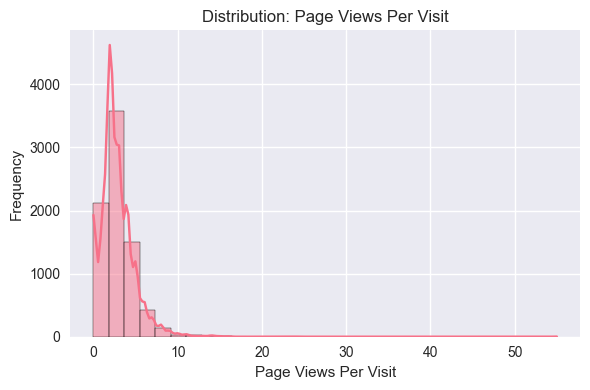

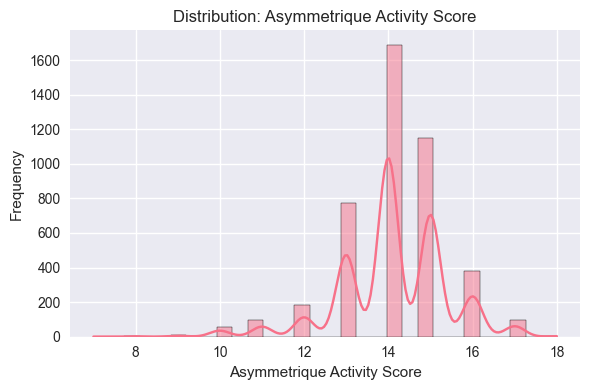

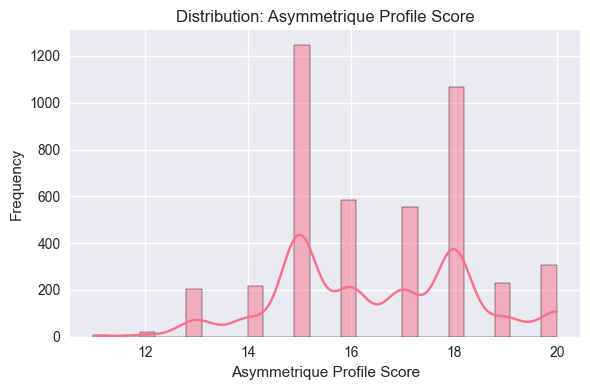

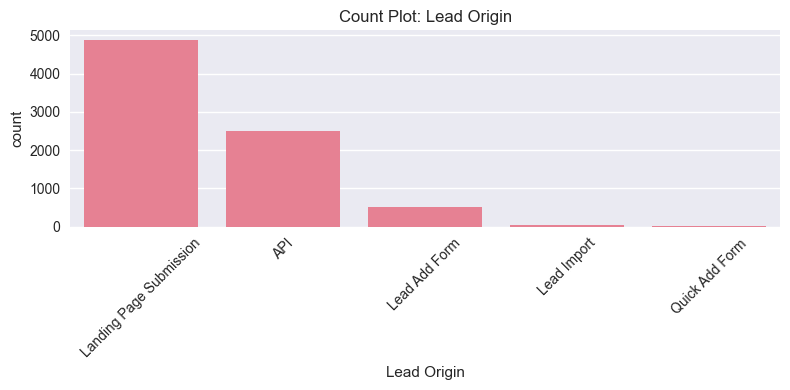

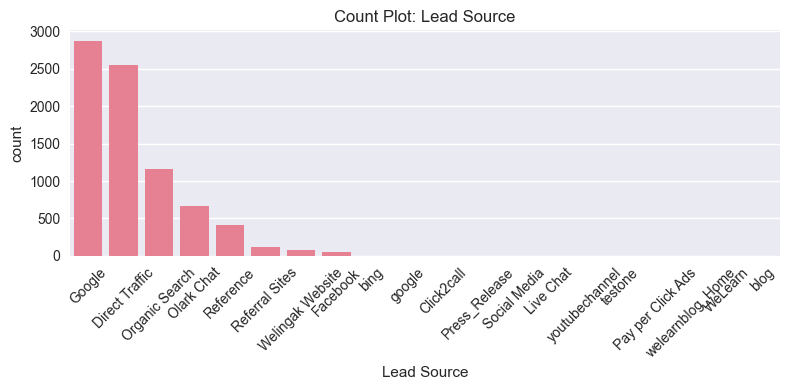

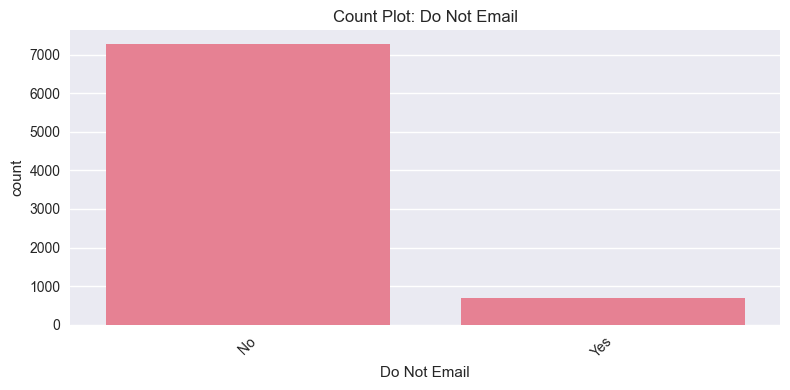

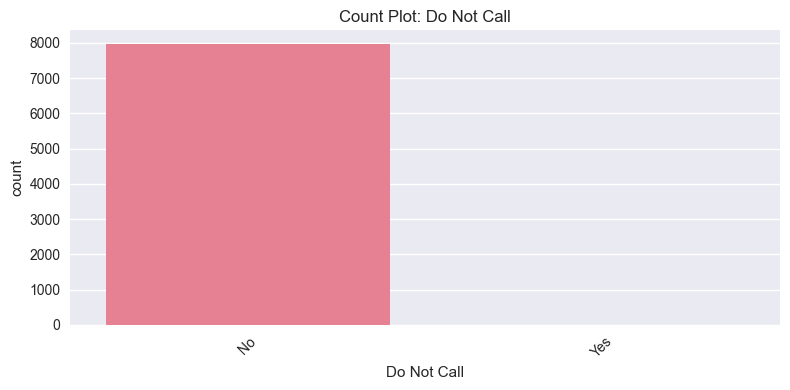

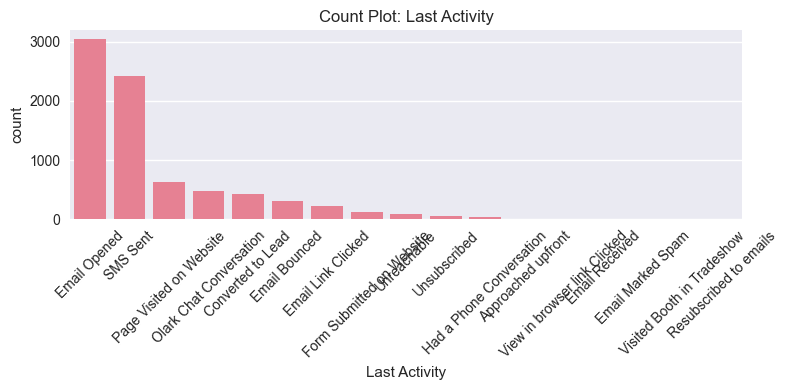

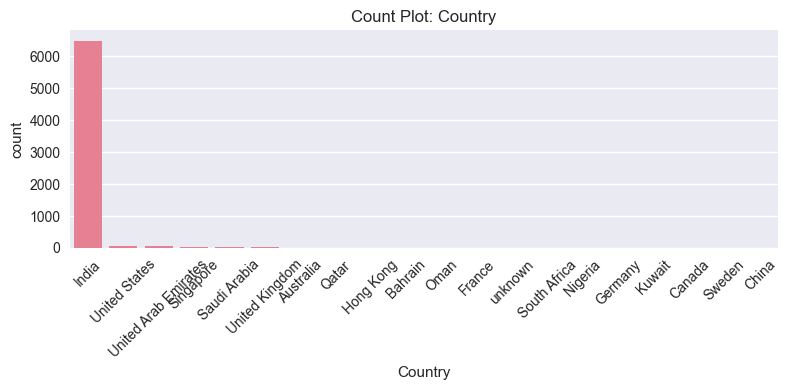

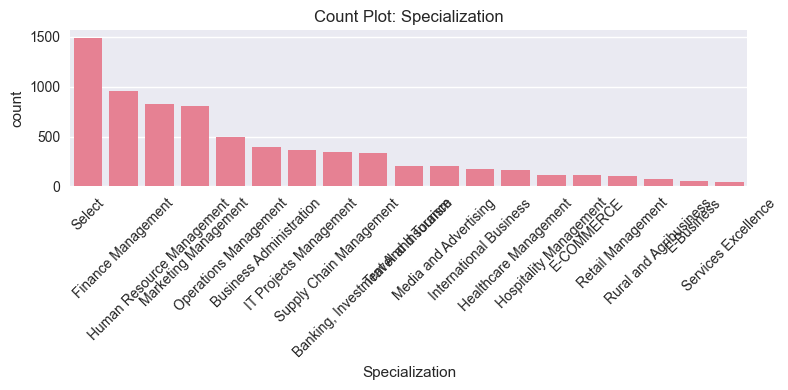

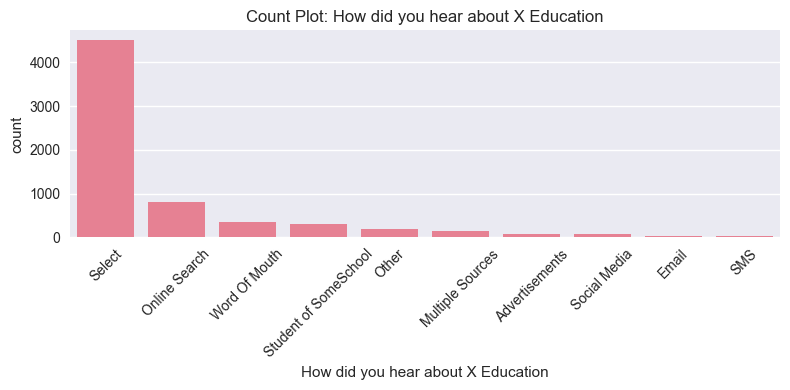

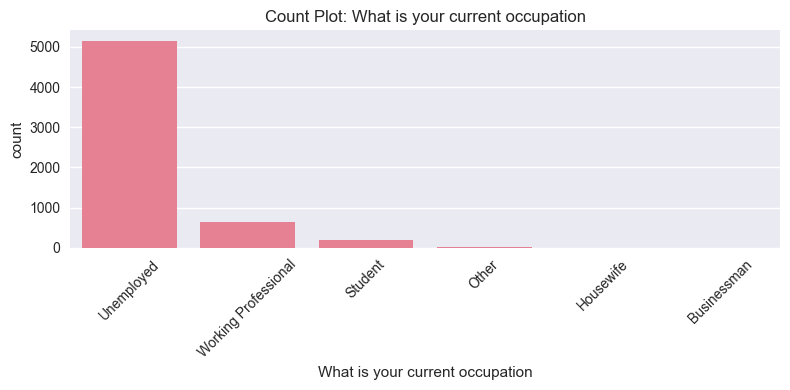

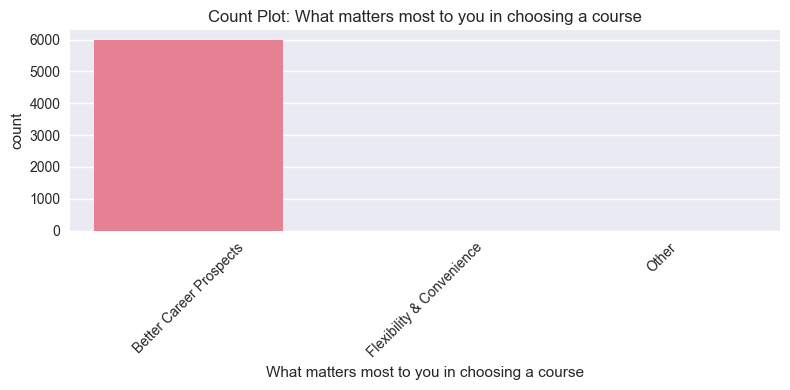

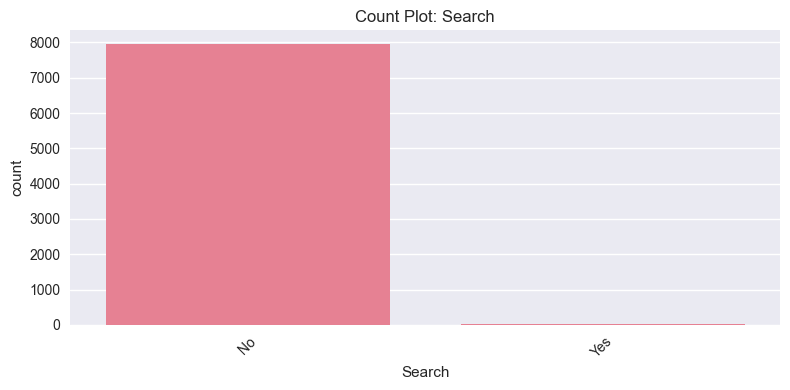

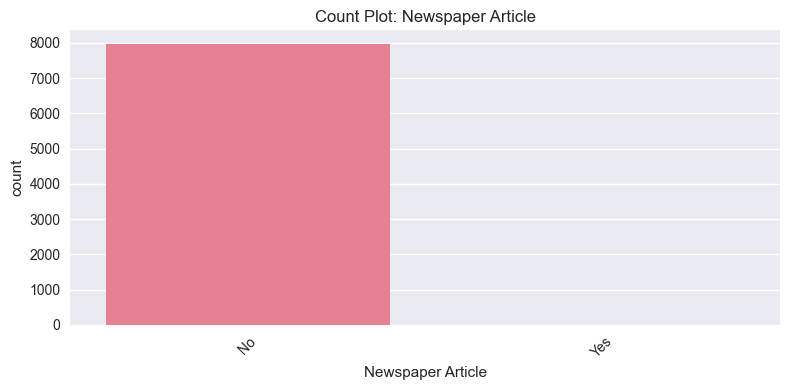

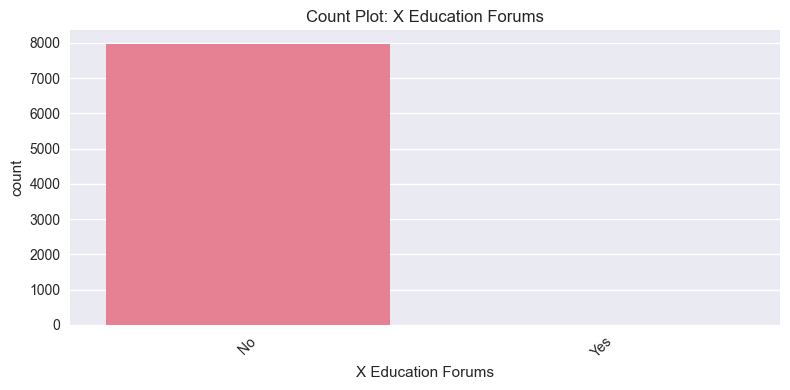

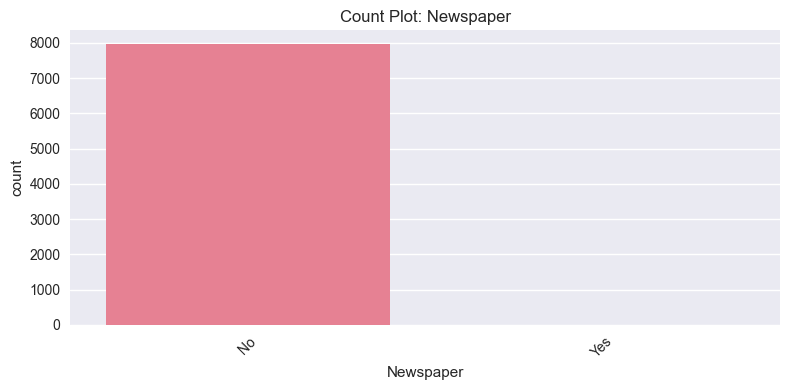

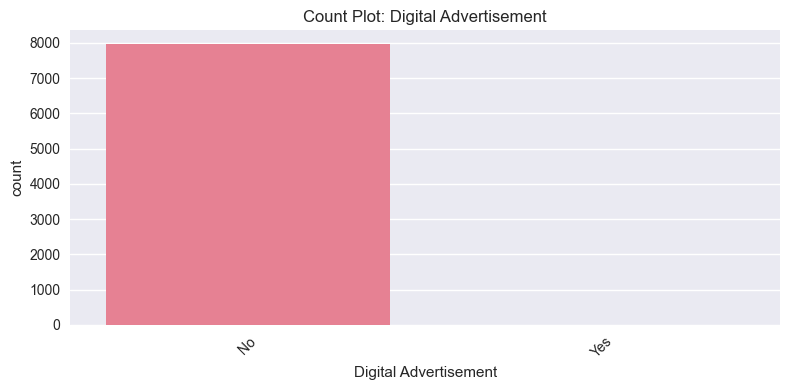

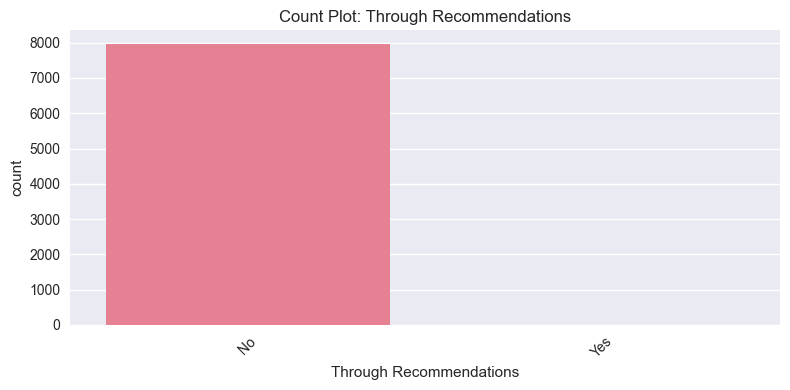

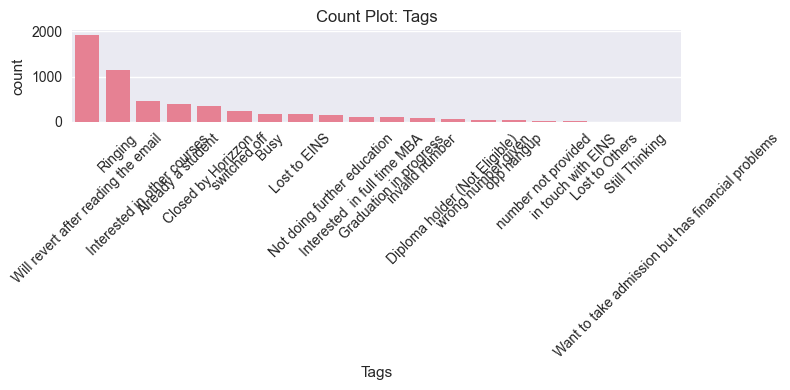

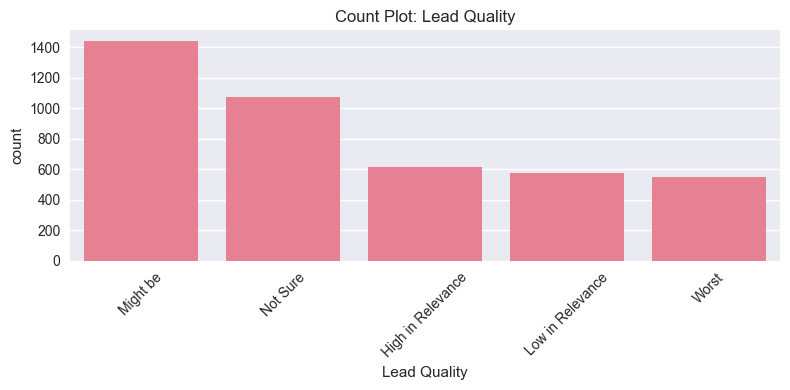

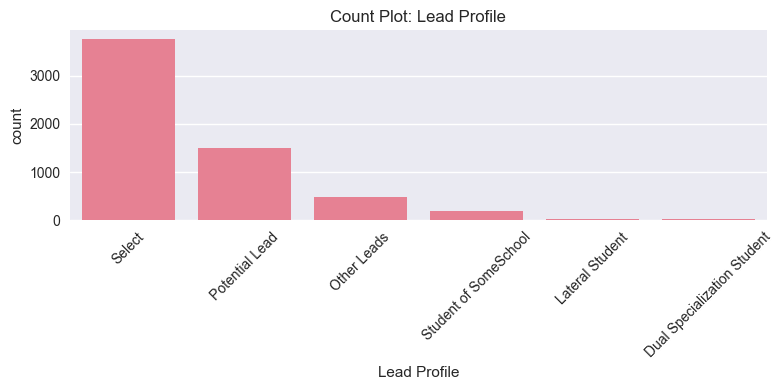

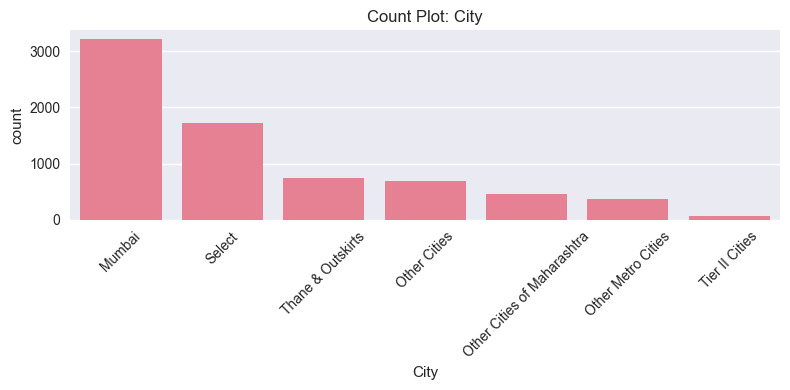

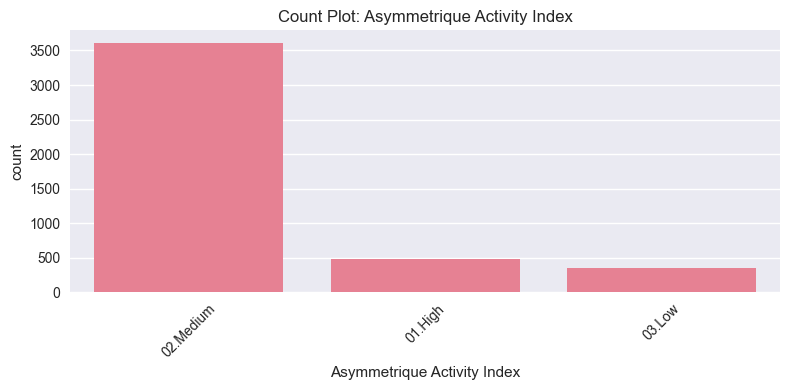

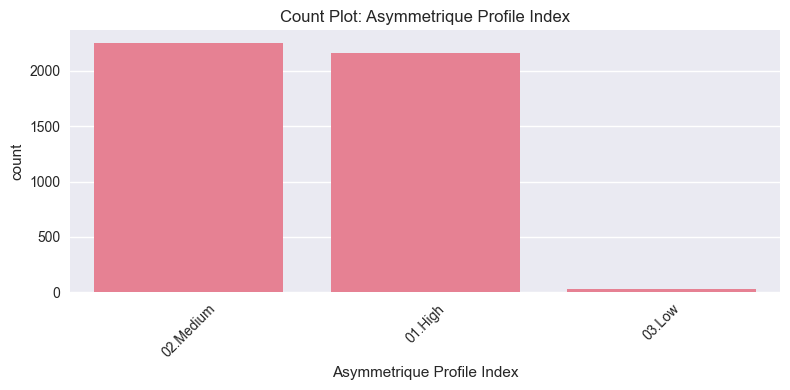

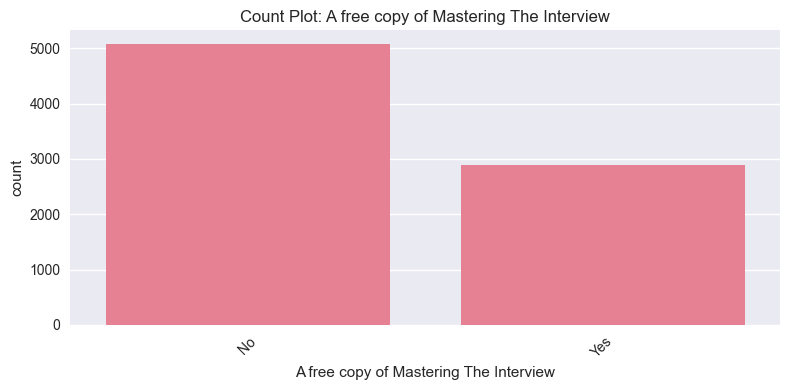

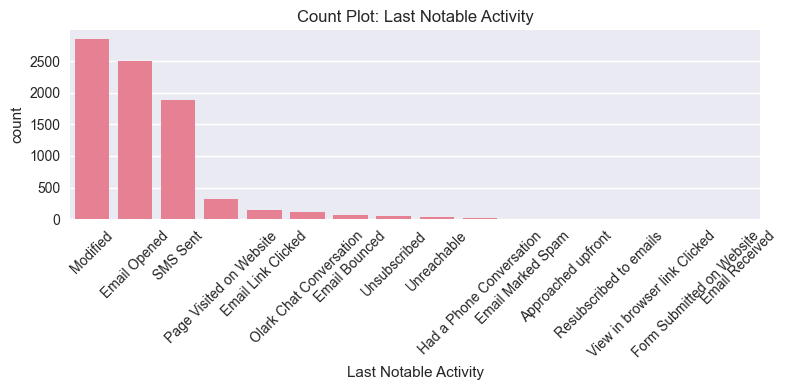

2025-07-17 11:36:12,229 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-17 11:36:12,240 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



📈 Bivariate Analysis vs 'Converted'


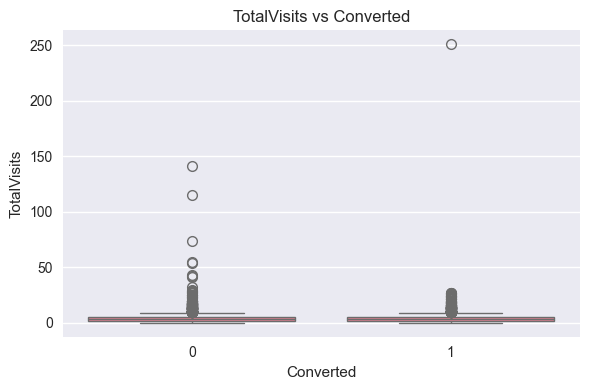

2025-07-17 11:36:12,392 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-17 11:36:12,403 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


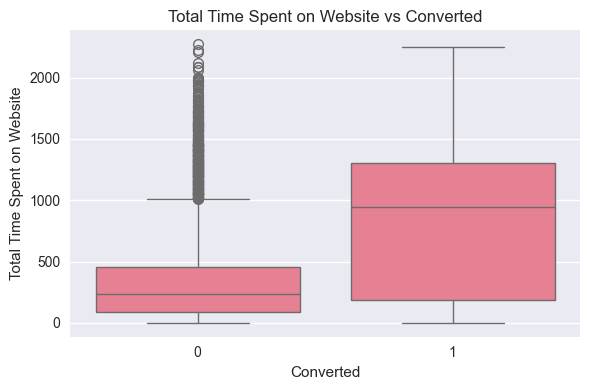

2025-07-17 11:36:12,540 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-17 11:36:12,550 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


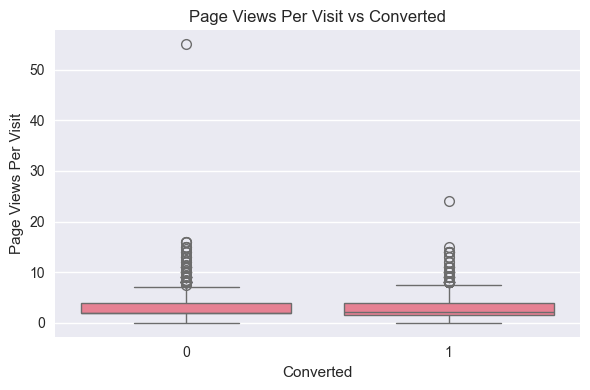

2025-07-17 11:36:12,679 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-17 11:36:12,692 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


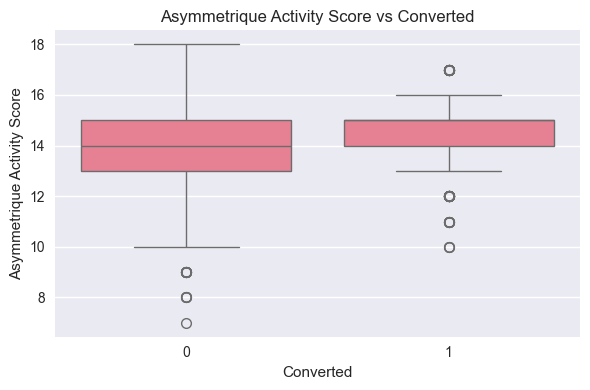

2025-07-17 11:36:12,853 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-17 11:36:12,863 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


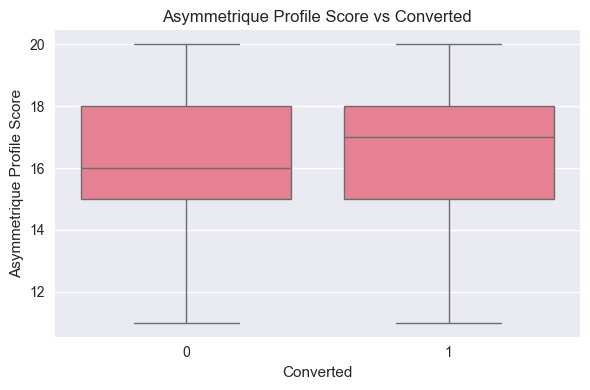

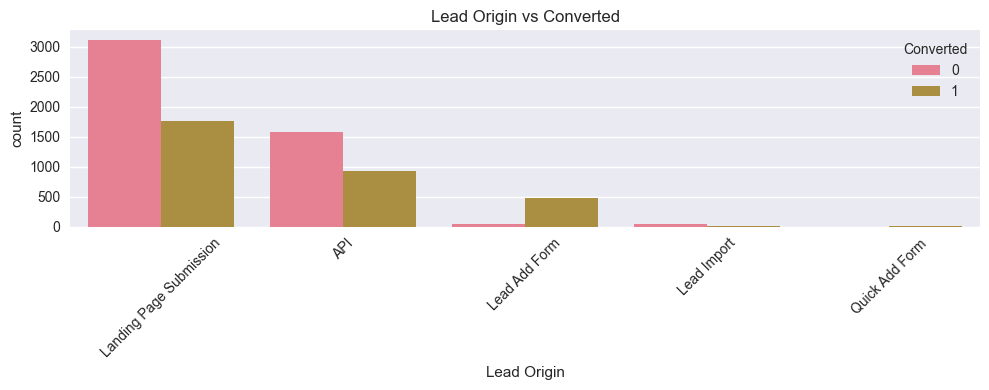

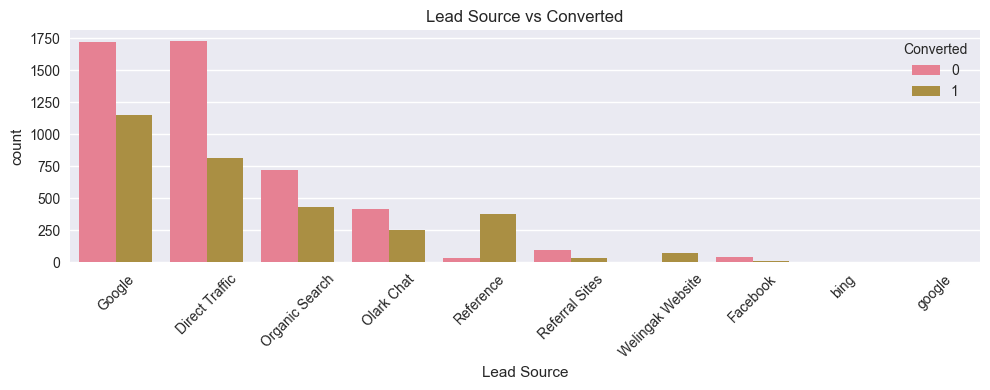

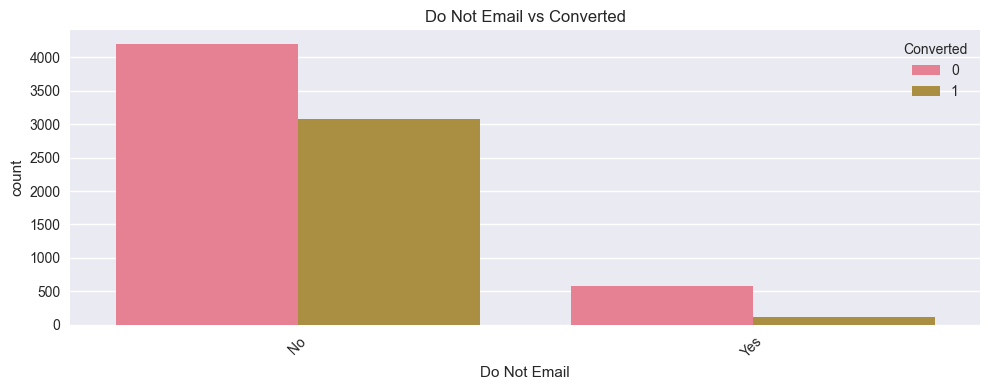

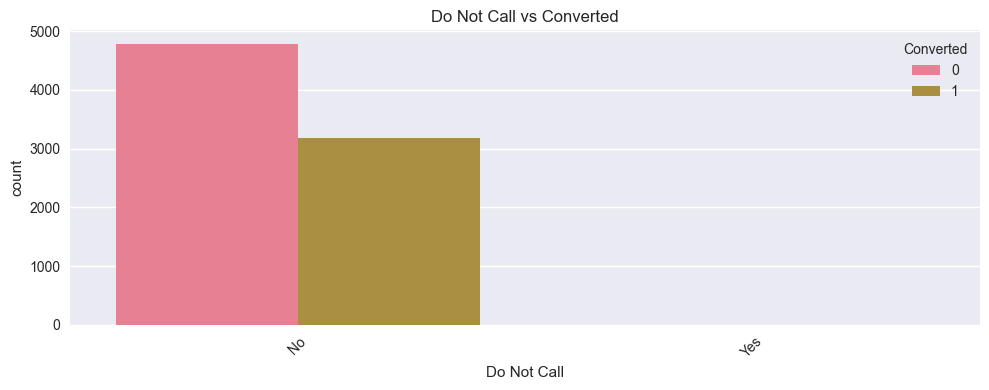

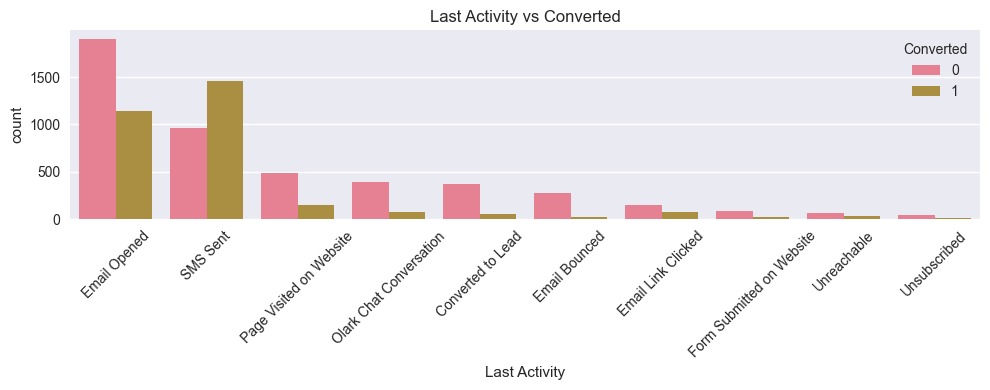

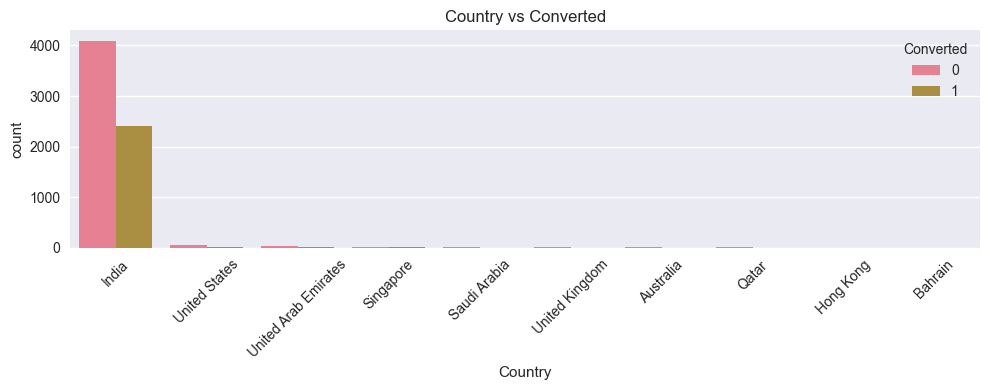

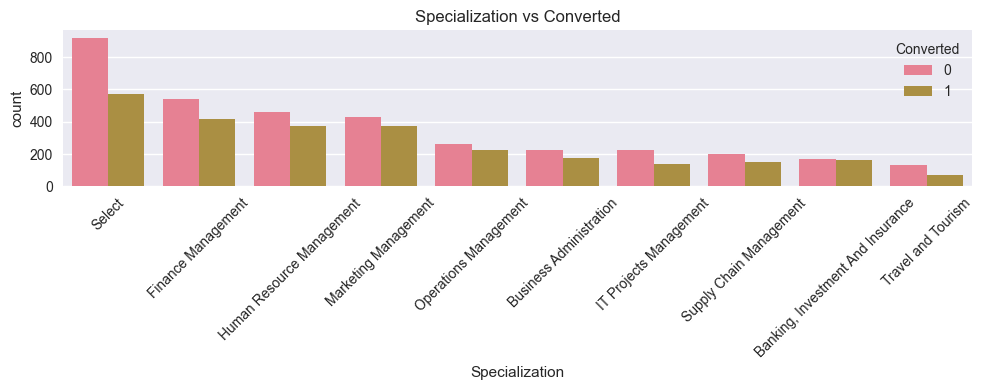

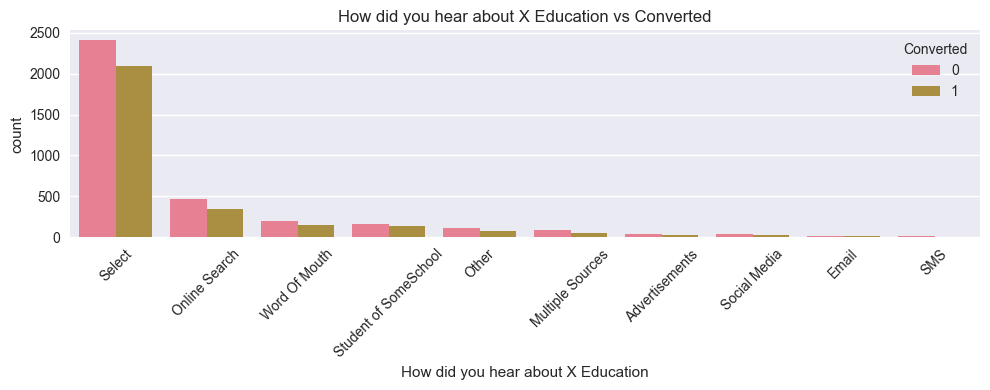

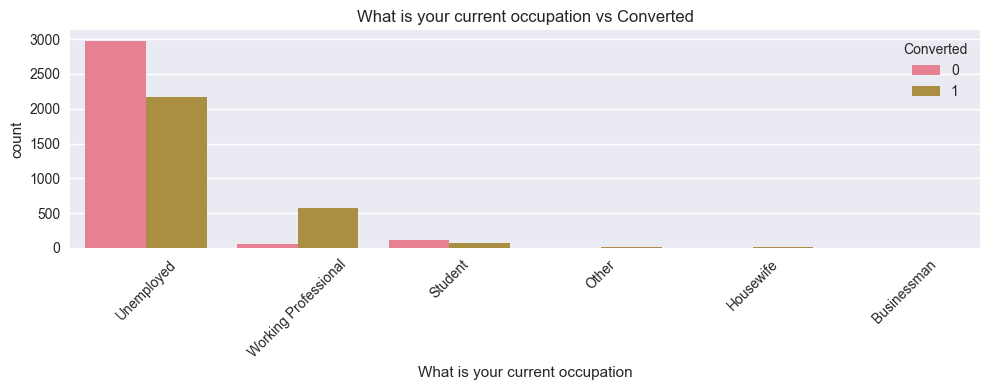

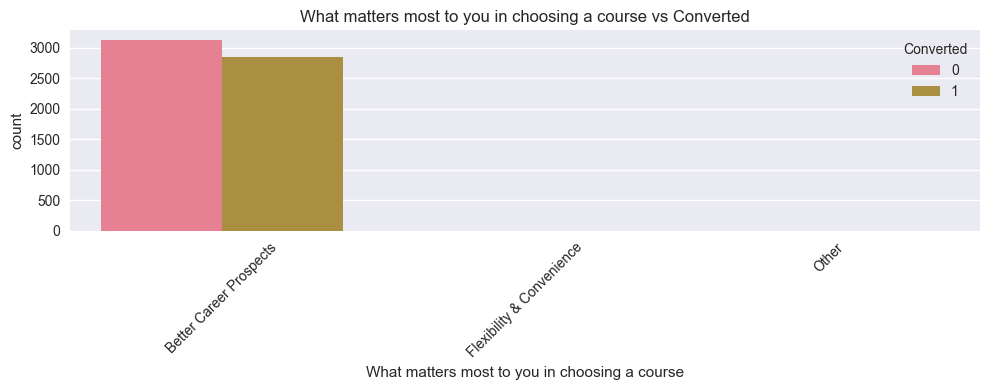

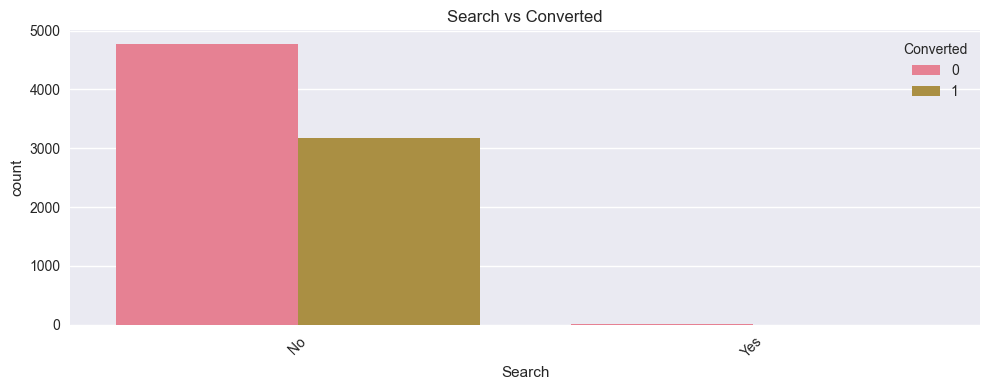

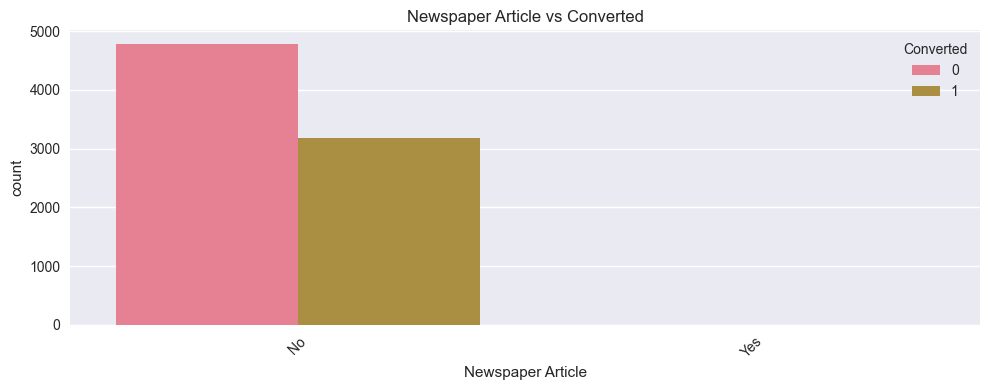

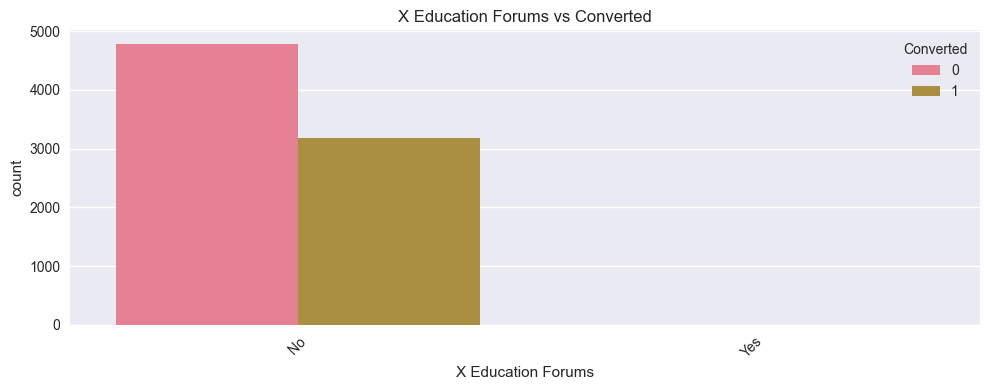

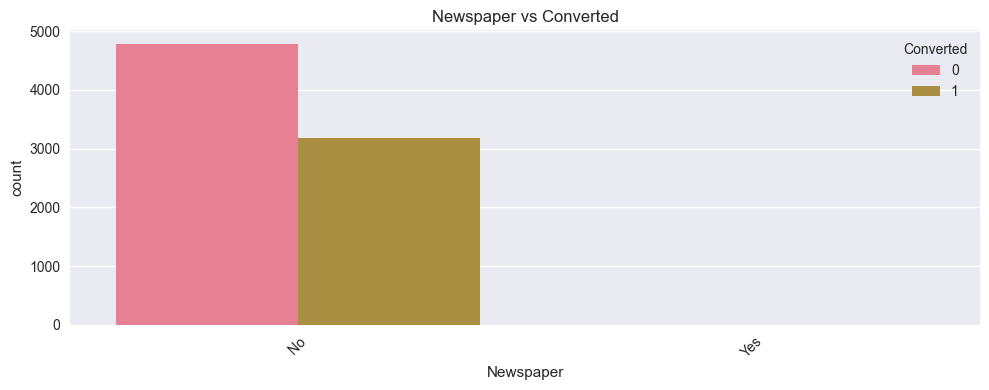

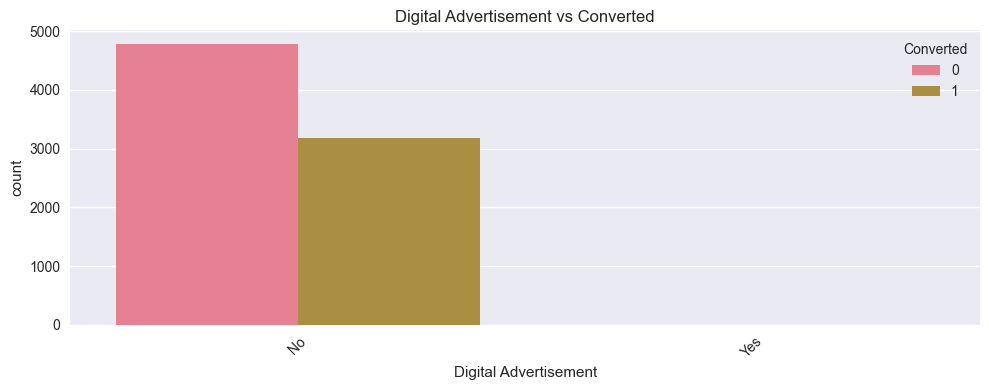

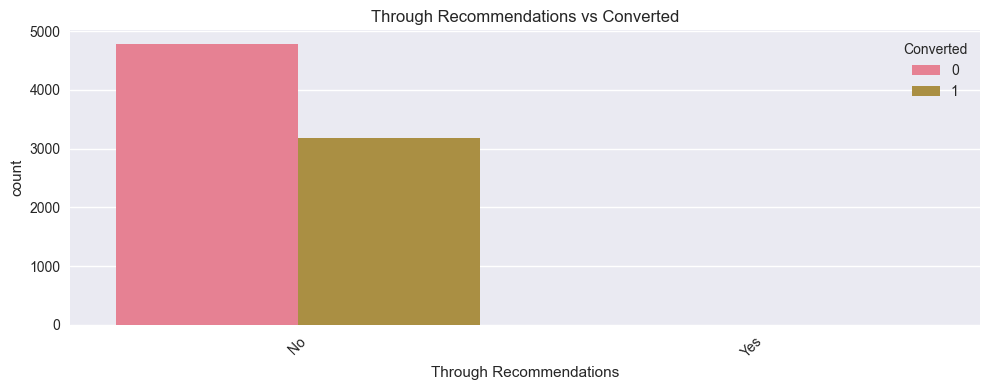

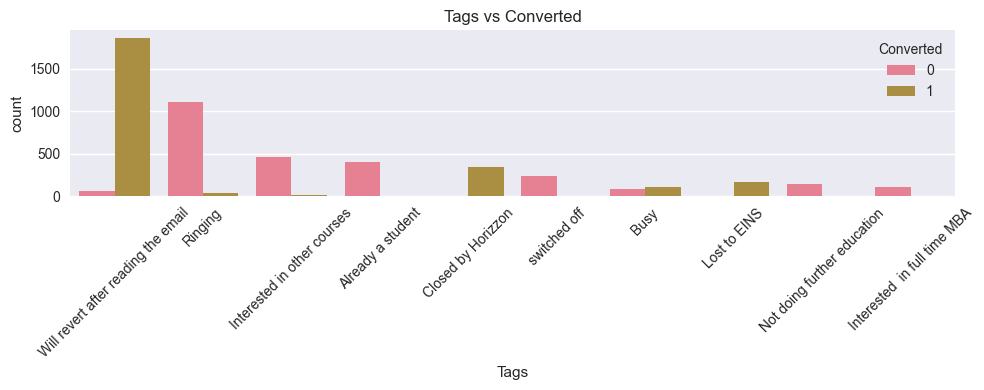

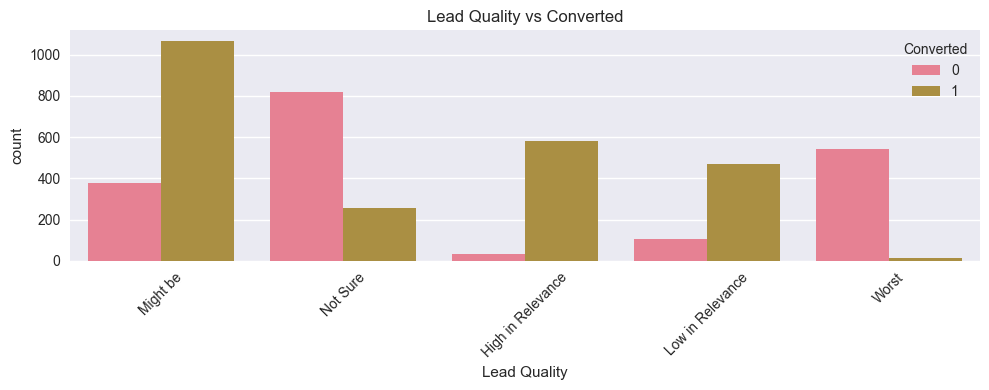

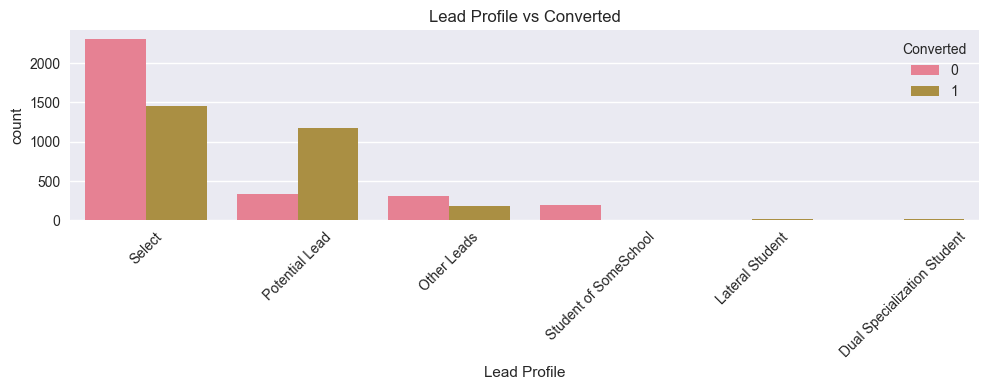

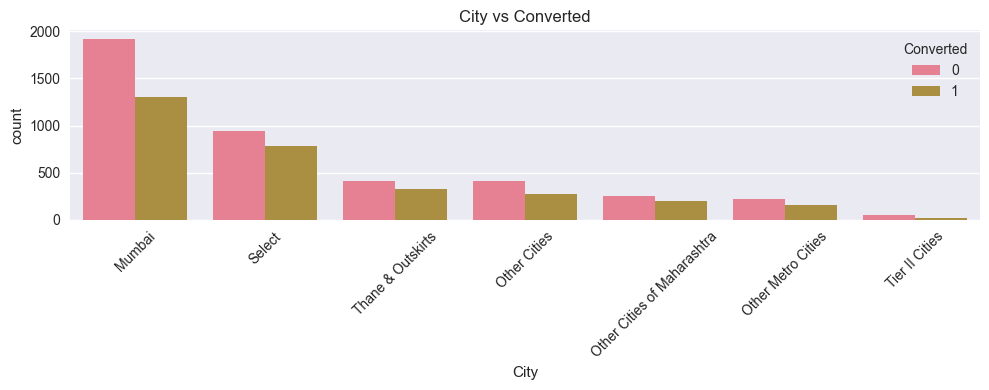

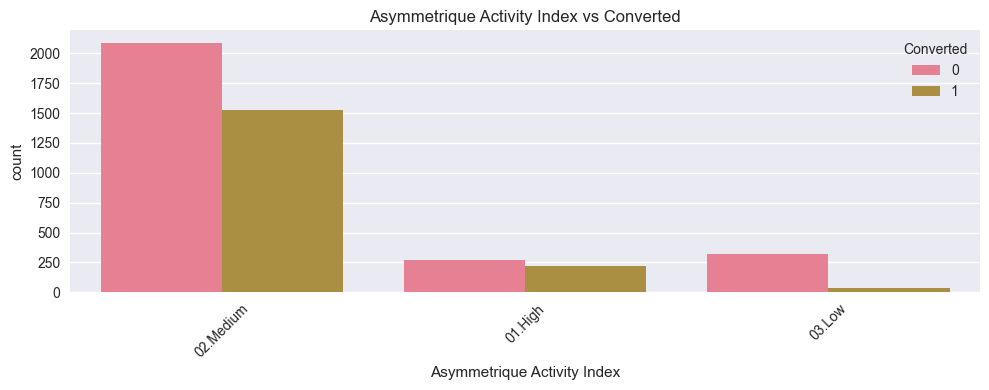

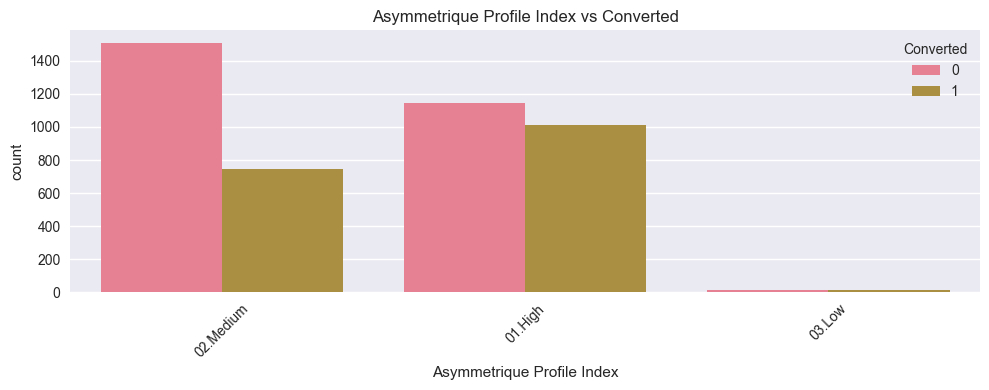

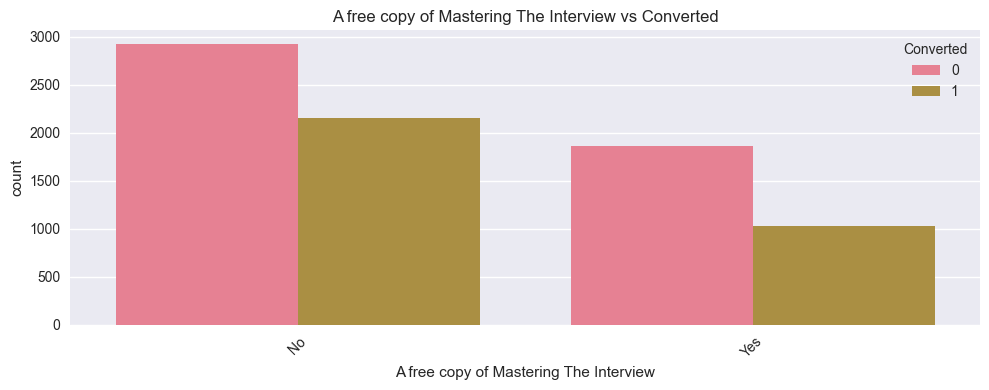

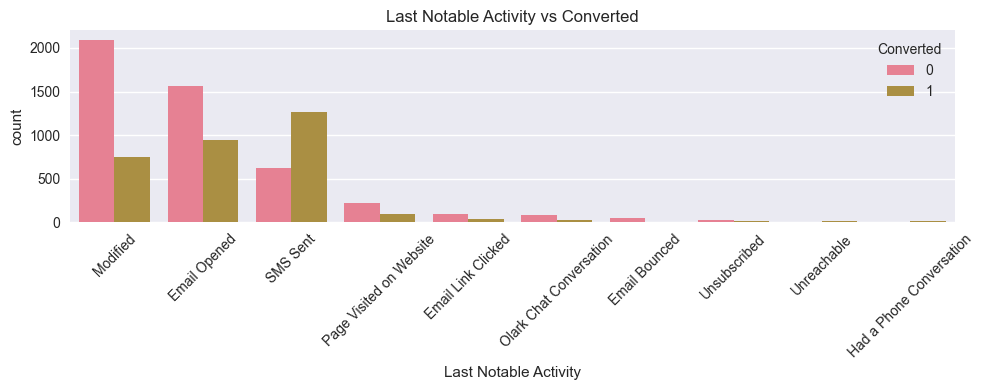

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Remove target from numeric list
if 'Converted' in numeric_cols:
    numeric_cols.remove('Converted')

# -------------------------------
# 1️⃣ Univariate Analysis
# -------------------------------

print("📊 Univariate Analysis")

# Numeric
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Categorical
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().iloc[:20].index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Count Plot: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 2️⃣ Bivariate Analysis (vs Converted)
# -------------------------------

print("\n📈 Bivariate Analysis vs 'Converted'")

# Numeric vs Converted
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Converted', y=col, data=df)
    plt.title(f"{col} vs Converted")
    plt.tight_layout()
    plt.show()

# Categorical vs Converted
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    top_categories = df[col].value_counts().iloc[:10].index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, hue="Converted", order=top_categories)
    plt.title(f"{col} vs Converted")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [196]:
df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      5986
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [197]:
for col in categorical_cols:
    print(f"\n🔹 Value Counts for: {col}")
    print(df[col].value_counts(dropna=False))


🔹 Value Counts for: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        2498
Lead Add Form               522
Lead Import                  52
Quick Add Form                1
Name: count, dtype: int64

🔹 Value Counts for: Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            673
Reference             410
Referral Sites        125
Welingak Website       73
Facebook               52
NaN                    33
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

🔹 Value Counts for: Do Not Email
Do Not Email
No     7263
Yes     696
Name: count, dtype: int64

🔹 Value Counts for: Do Not C

**Null Value Handling Strategy**

| Column                                  | Action                                           |
| --------------------------------------- | ------------------------------------------------ |
| **Lead Source**                         | Fill NaN with `"Missing"`                        |
| **Country**                             | Fill NaN with `"India"` (most frequent)          |
| **Specialization**                      | Fill NaN with `"Missing"`                        |
| **How did you hear about X Education**  | Fill NaN with `"Missing"`                        |
| **What is your current occupation**     | Fill NaN with `"Unemployed"` (mode)              |
| **What matters most to you...**         | Fill NaN with `"Better Career Prospects"` (mode) |
| **Tags**                                | Fill NaN with `"Missing"`                        |
| **Lead Quality**                        | Fill NaN with `"Missing"`                        |
| **Lead Profile**                        | Fill NaN with `"Missing"`                        |
| **City**                                | Fill NaN with `"Missing"`                        |
| **Asymmetrique Activity/Profile Index** | Ordinal encode + fill with median                |
| **Asymmetrique Scores**                 | Fill NaN with median                             |
| **Numerical (TotalVisits, Page Views)** | Fill NaN with median                             |


**Columns to Drop**
These columns are:
Low variance (Newspaper, X Education Forums, etc.)

| Drop Column                                                      |
| ---------------------------------------------------------------- |
| `Newspaper`, `Newspaper Article`, `X Education Forums`, `Search` |
| `Through Recommendations` (very sparse)                          |


In [198]:
# Filling the missing null values and label encoding "Asymmetrique Profile Index" and "Asymmetrique Activity Index"
# and dropping unneccesary columns
drop_cols = [
    'Newspaper', 'Newspaper Article',
    'X Education Forums', 'Search', 'Through Recommendations'
]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Standardize labels
df['Lead Source'] = df['Lead Source'].str.strip().str.lower()
df['Lead Source'] = df['Lead Source'].replace({'google': 'Google'})
df['Lead Source'] = df['Lead Source'].fillna('Missing')

# Replace 'Select' with 'Missing'
select_to_missing_cols = [
    'Specialization', 'Lead Profile', 'City', 'How did you hear about X Education'
]
for col in select_to_missing_cols:
    df[col] = df[col].replace('Select', 'Missing')
    df[col] = df[col].fillna('Missing')

# Fill remaining high-null categorical columns
df['Country'] = df['Country'].fillna('India')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unemployed')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Better Career Prospects')
df['Tags'] = df['Tags'].fillna('Missing')
df['Lead Quality'] = df['Lead Quality'].fillna('Missing')

# Ordinal encoding for Asymmetrique Index columns
ordinal_map = {"01.High": 3, "02.Medium": 2, "03.Low": 1}
df["Asymmetrique Profile Index"] = df["Asymmetrique Profile Index"].map(ordinal_map)
df["Asymmetrique Activity Index"] = df["Asymmetrique Activity Index"].map(ordinal_map)

# Fill with median
for col in [
    'Asymmetrique Profile Index', 'Asymmetrique Activity Index',
    'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
    'TotalVisits', 'Page Views Per Visit'
]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Done
print("✅ Data cleaned and ready. Remaining nulls:")
print(df.isnull().sum()[df.isnull().sum() > 0])


✅ Data cleaned and ready. Remaining nulls:
Last Activity    103
dtype: int64


Mapping the labels of the columns with similar meaning and if more labels to convert to less labels

**Merge Similar Categorical Labels**

| Column                  | Merge Rules                                     |
| ----------------------- | ----------------------------------------------- |
| **Lead Source**         | Merge `"google"` with `"Google"`, lowercase all |
| **Specialization**      | Replace `"Select"` with `"Missing"`             |
| **Lead Profile**        | Replace `"Select"` with `"Missing"`             |
| **How did you hear...** | Replace `"Select"` with `"Missing"`             |
| **City**                | Replace `"Select"` with `"Missing"`             |


In [199]:
lead_source_map = {
    'google': 'Google',
    'google ads': 'Google',
    'organic search': 'Organic Search',
    'olark chat': 'Olark Chat',
    'direct traffic': 'Direct Traffic',
    'reference': 'Reference',
    'welingak website': 'Welingak',
    'facebook': 'Social Media',
    'bing': 'Other',
    'click2call': 'Other',
    'press_release': 'Other',
    'social media': 'Social Media',
    'live chat': 'Olark Chat',
    'youtubechannel': 'Other',
    'testone': 'Other',
    'pay per click ads': 'Other',
    'welearnblog_home': 'Other',
    'welearn': 'Other',
    'blog': 'Other',
    'nc_edm': 'Other'
}


In [200]:
specialization_map = {
    'finance management': 'Finance',
    'banking, investment and insurance': 'Finance',
    'human resource management': 'HR',
    'marketing management': 'Marketing',
    'operations management': 'Operations',
    'it projects management': 'IT',
    'business administration': 'Business',
    'supply chain management': 'Operations',
    'e-commerce': 'Business',
    'retail management': 'Marketing',
    'media and advertising': 'Marketing',
    'travel and tourism': 'Other',
    'international business': 'Business',
    'healthcare management': 'Other',
    'hospitality management': 'Other',
    'rural and agribusiness': 'Other',
    'e-business': 'Business',
    'services excellence': 'Other',
    'missing': 'Missing',
    'select': 'Missing'
}


In [201]:
tags_map = {
    'will revert after reading the email': 'Reverting',
    'interested in other courses': 'Interested Other',
    'interested  in full time mba': 'Interested Other',
    'graduation in progress': 'Interested Other',
    'not doing further education': 'Not Interested',
    'wrong number given': 'Not Reachable',
    'opp hangup': 'Not Reachable',
    'number not provided': 'Not Reachable',
    'invalid number': 'Not Reachable',
    'still thinking': 'Still Thinking',
    'shall take in the next coming month': 'Still Thinking',
    'want to take admission but has financial problems': 'Still Thinking',
    'lost to eins': 'Lost',
    'lost to others': 'Lost',
    'in touch with eins': 'Lost',
    'diploma holder (not eligible)': 'Not Eligible',
    'university not recognized': 'Not Eligible',
    'recognition issue (dec approval)': 'Not Eligible',
    'already a student': 'Already Student',
    'switched off': 'Not Reachable',
    'busy': 'Not Reachable',
    'ringing': 'Not Reachable',
    'missing': 'Missing',
    '': 'Missing',
}


In [202]:
lead_quality_map = {
    'high in relevance': 'High',
    'might be': 'Medium',
    'not sure': 'Medium',
    'low in relevance': 'Low',
    'worst': 'Low',
    'missing': 'Missing'
}


In [203]:
lead_profile_map = {
    'potential lead': 'Potential',
    'other leads': 'Other',
    'student of someschool': 'Student',
    'lateral student': 'Student',
    'dual specialization student': 'Student',
    'select': 'Missing',
    'missing': 'Missing'
}


In [204]:
heard_map = {
    'online search': 'Online',
    'word of mouth': 'Referral',
    'student of someschool': 'Referral',
    'multiple sources': 'Multiple',
    'advertisements': 'Ads',
    'social media': 'Social',
    'email': 'Direct',
    'sms': 'Direct',
    'other': 'Other',
    'select': 'Missing',
    'missing': 'Missing'
}


In [205]:
# Clean cell values only (not column names)
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Apply mappings with correct column names
df['Lead Source'] = df['Lead Source'].replace(lead_source_map)
df['Specialization'] = df['Specialization'].replace(specialization_map)
df['Tags'] = df['Tags'].replace(tags_map)
df['Lead Quality'] = df['Lead Quality'].replace(lead_quality_map)
df['Lead Profile'] = df['Lead Profile'].replace(lead_profile_map)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(heard_map)



In [206]:
df.shape

(7959, 25)

Apply Yeo-Jonhson transformation for numeric columns as some columns have zero values we cannot use log transformation if skewness is >0.5

It's better to use winsorization for outliers as this won't reduce dataset size further more.